In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

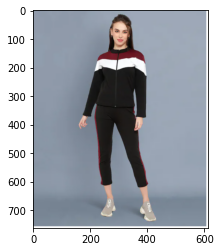

In [2]:
image = cv2.imread('apple.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

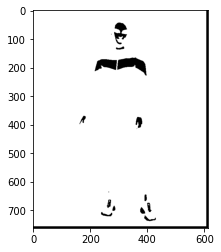

In [3]:
# Blurring for removing the noise 
image_blur = cv2.bilateralFilter(image, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
image_gray = cv2.cvtColor(image_blur, cv2.COLOR_RGB2GRAY)# Apply the thresholding
a = image_gray.max()  
_, thresh = cv2.threshold(image_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

In [4]:
# Find the contour of the figure 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

[array([[[  0,   0]],

       [[  0, 755]],

       [[605, 755]],

       [[605,   0]]], dtype=int32), array([[[346, 166]],

       [[347, 165]],

       [[348, 165]],

       [[349, 166]],

       [[356, 166]],

       [[357, 165]],

       [[359, 165]],

       [[363, 169]],

       [[365, 169]],

       [[366, 170]],

       [[367, 170]],

       [[368, 171]],

       [[369, 171]],

       [[370, 172]],

       [[372, 172]],

       [[373, 173]],

       [[374, 173]],

       [[375, 174]],

       [[376, 174]],

       [[377, 175]],

       [[379, 175]],

       [[380, 176]],

       [[382, 176]],

       [[383, 177]],

       [[384, 177]],

       [[389, 182]],

       [[389, 183]],

       [[390, 184]],

       [[390, 185]],

       [[392, 187]],

       [[392, 188]],

       [[393, 189]],

       [[393, 194]],

       [[394, 195]],

       [[394, 202]],

       [[395, 203]],

       [[395, 212]],

       [[396, 213]],

       [[396, 222]],

       [[397, 223]],

       [[397, 228

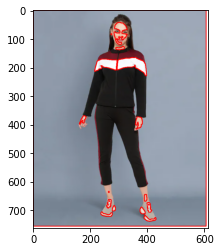

In [6]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)# Draw the contour 
print(contours)
image_copy = image.copy()
final = cv2.drawContours(image_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
print(final)
plt.imshow(image_copy)

In [7]:
# The first order of the contours
c_0 = contours[0]# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03'])


In [9]:
# The area of contours 
print("Area of the 1st Contour : ", cv2.contourArea(contours[0])) 
print("Area of the 2nd Contour : ", cv2.contourArea(contours[1])) 
print("Area of the 3rd Contour : ", cv2.contourArea(contours[2]))

Area of the 1st Contour :  49755.0
Area of the 2nd Contour :  1252.0
Area of the 3rd Contour :  72.5


In [10]:
# The arc length of contours 
print(cv2.arcLength(contours[0], closed = True)) 
print(cv2.arcLength(contours[0], closed = False))

982.9503530263901
978.9503530263901


In [11]:
# The centroid point
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

In [12]:
# The extreme points
l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])
pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

In [13]:
# The first order of the contours
c_0 = contours[0]# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)# Draw a straight rectangle with the points
image_copy = image.copy()
image_box = cv2.rectangle(image_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

In [14]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')# Draw a contour with the points 
image_copy = image.copy()
image_box_2 = cv2.drawContours(image_copy, contours = [box], 
                             contourIdx = -1, 
                             color = (255, 0, 0), thickness = 2)

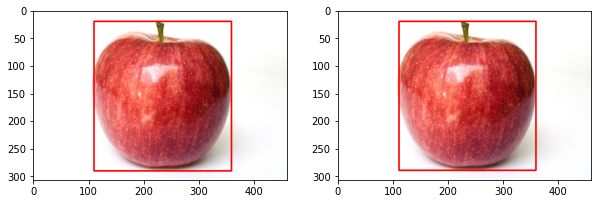

In [15]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(image_box)
plt.subplot(1, 2, 2); plt.imshow(image_box_2)

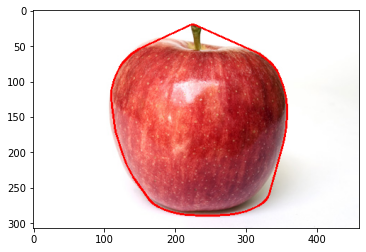

In [16]:
# Detect the convex contour
hull = cv2.convexHull(c_0)
image_copy = image.copy()
image_hull = cv2.drawContours(image_copy, contours = [hull], 
                            contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
plt.imshow(image_hull)